In [1]:
# Find modelling module
import sys
sys.path.insert(1, '../src/models')

# Import modelling functions
import modelling as mod

# Silence umap library warnings (it's fine, trust me)
import warnings
warnings. filterwarnings('ignore')


%matplotlib inline

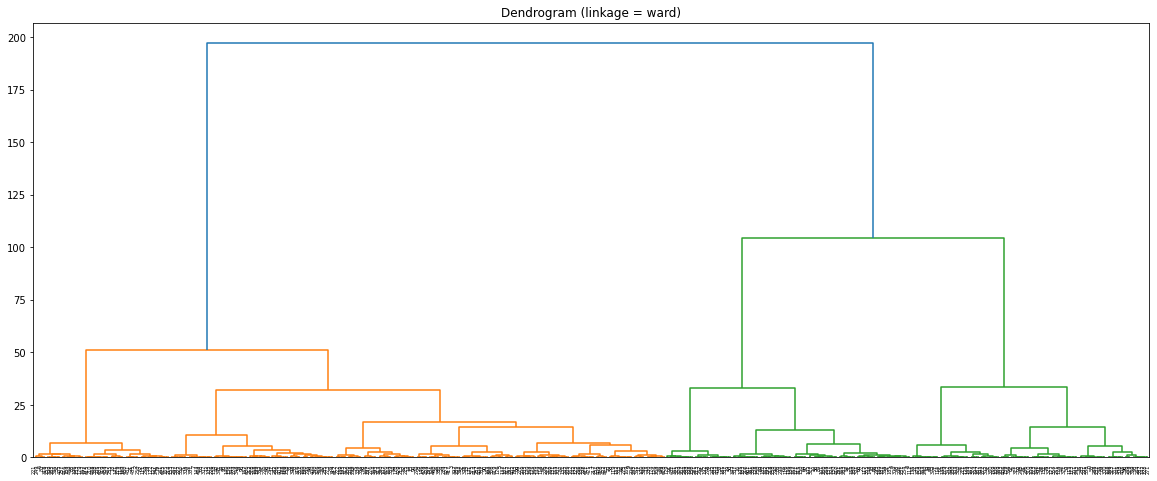

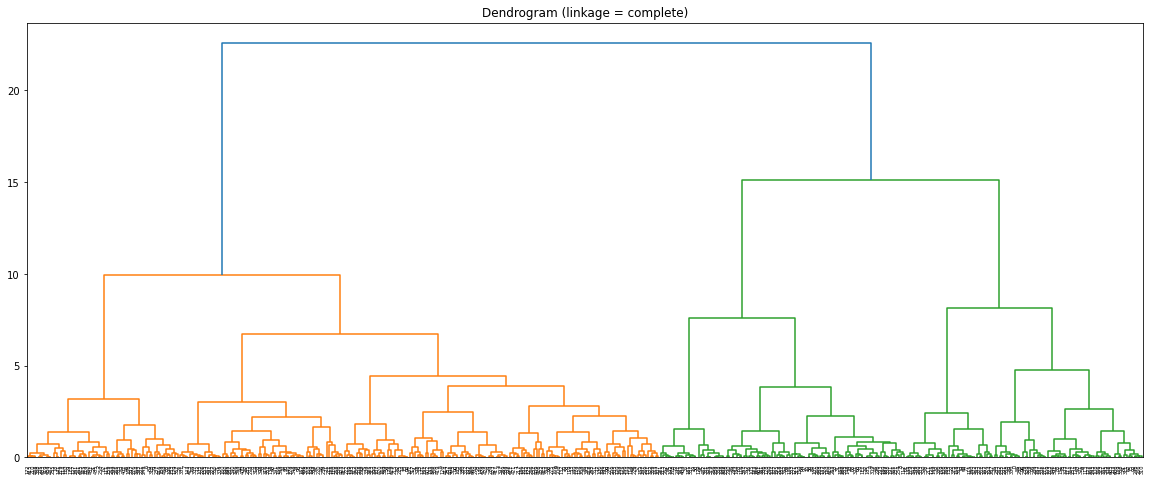

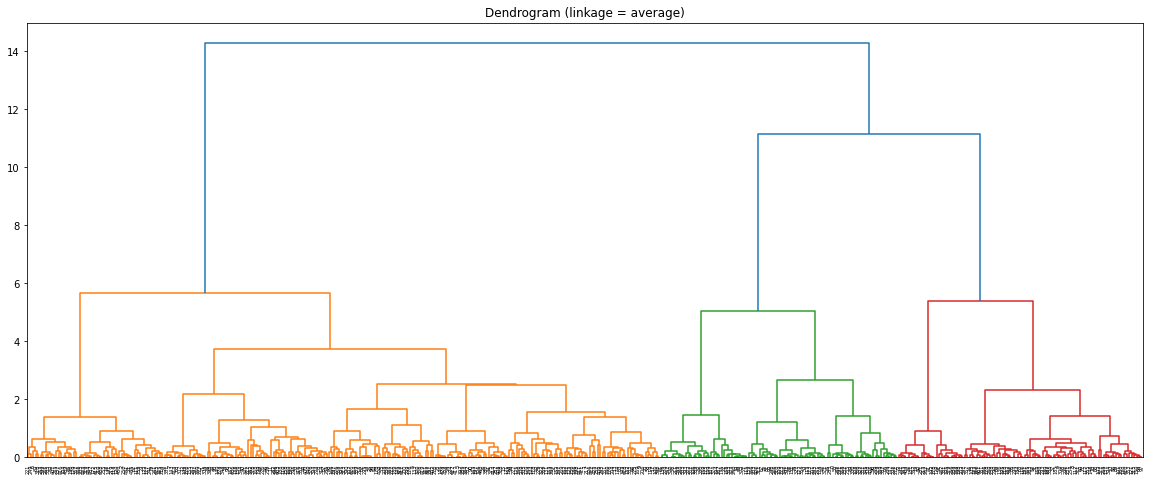

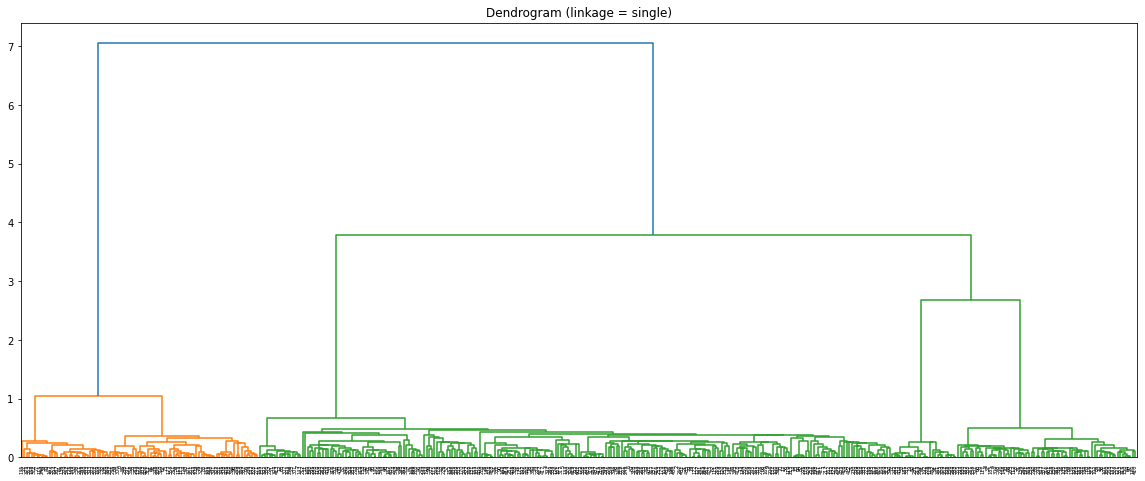

In [5]:
## Hierarchical agglomerative clustering ##
embedded = mod.umap.UMAP().fit_transform(mod.data)

# linkage ward
_ = mod.hieragglo(embedded, linkage="ward", dendro=True)

# linkage complete
_ = mod.hieragglo(embedded, linkage="complete", dendro=True)

# linkage average
_ = mod.hieragglo(embedded, linkage="average", dendro=True)

# linkage single
_ = mod.hieragglo(embedded, linkage="single", dendro=True)

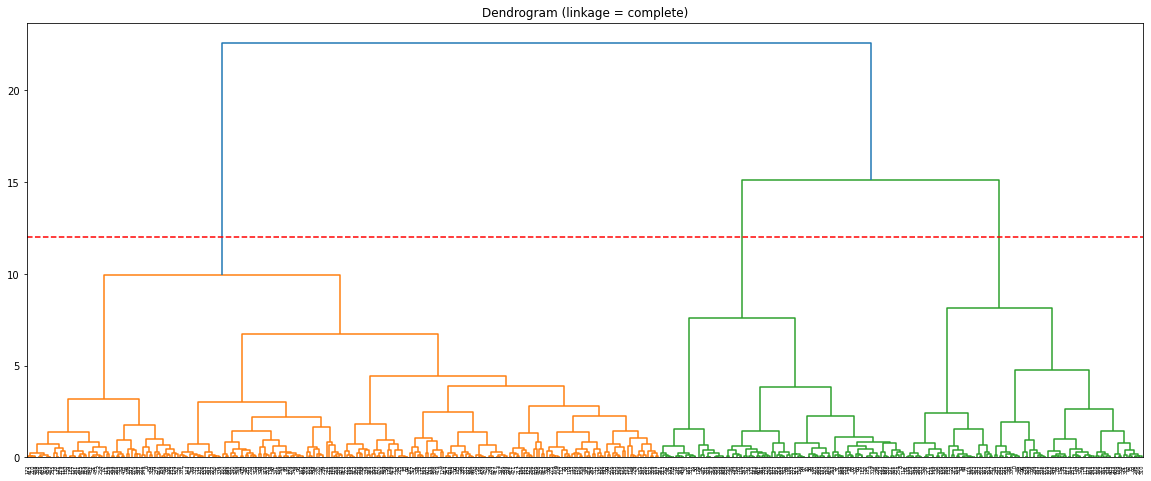

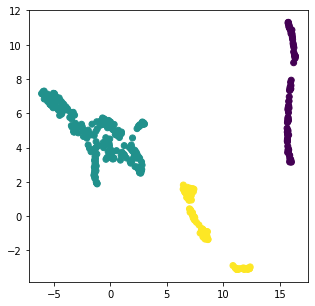

In [6]:
clusters = mod.hieragglo(embedded, transform=None, linkage="complete", criteria="height", parameter=12, dendro=True)
mod.plot_data(embedded, transform=None, clusters=clusters)

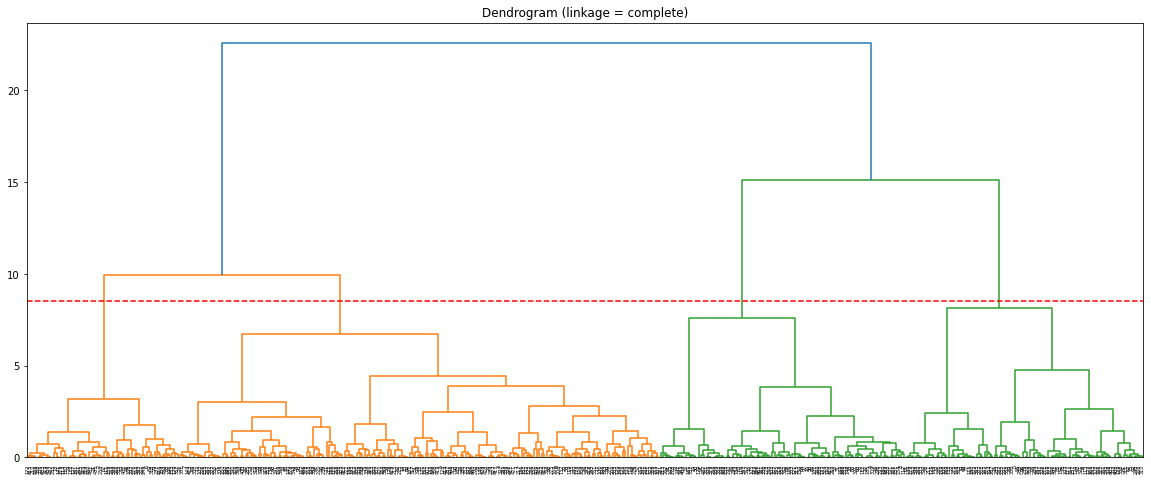

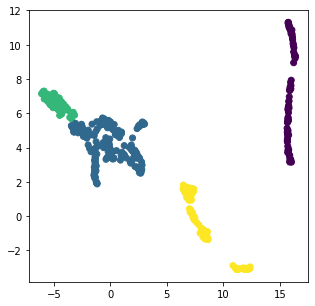

In [7]:
clusters = mod.hieragglo(embedded, transform=None, linkage="complete", criteria="height", parameter=8.5, dendro=True)
mod.plot_data(embedded, transform=None, clusters=clusters)

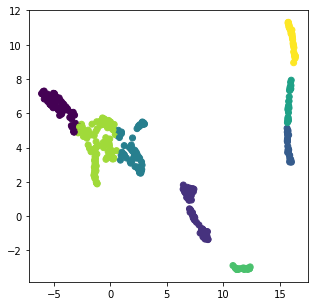

In [8]:
## K Means ##
label = mod.sklc.KMeans(n_clusters=8).fit_predict(embedded)
mod.plot_data(embedded, transform=None, clusters=label)

# Create clusters

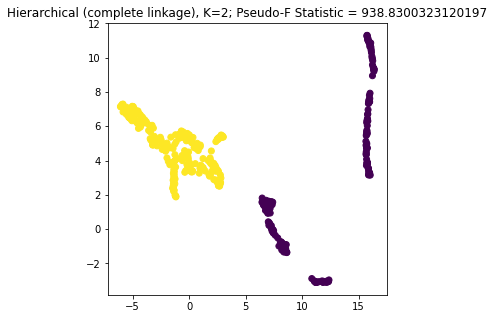

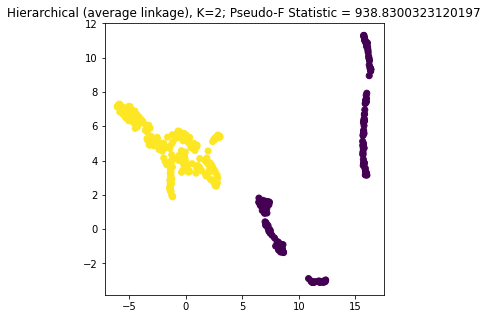

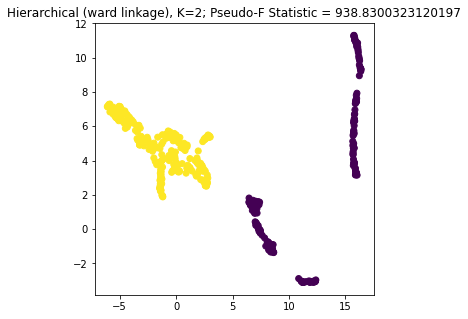

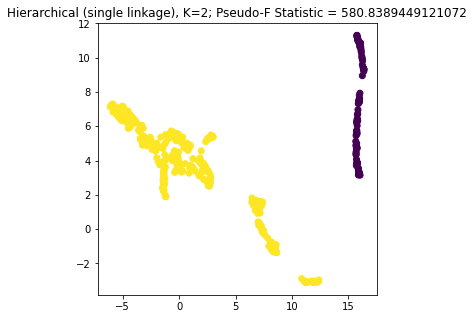

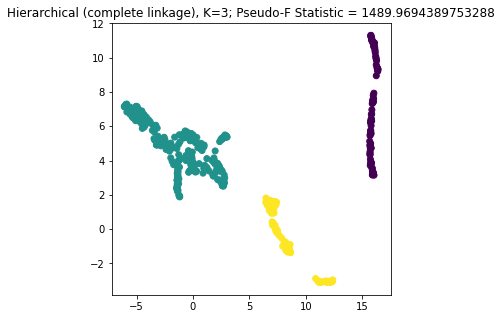

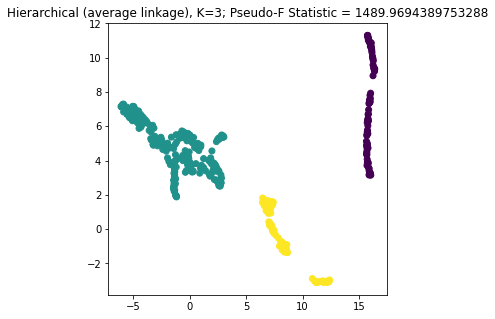

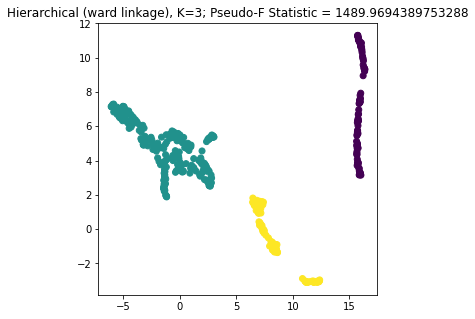

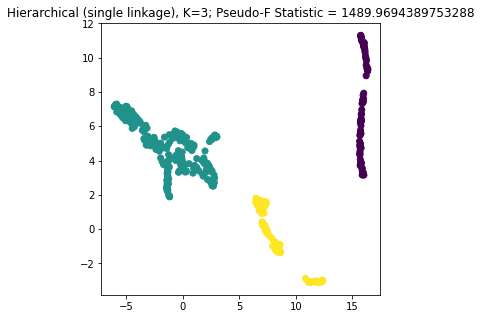

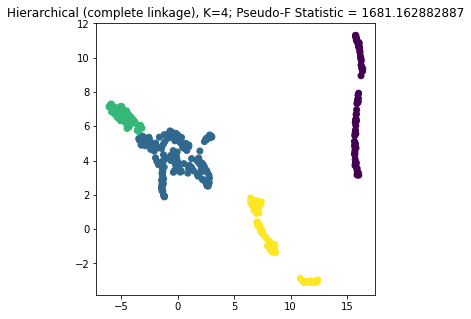

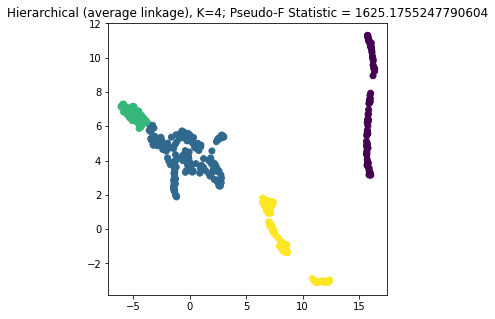

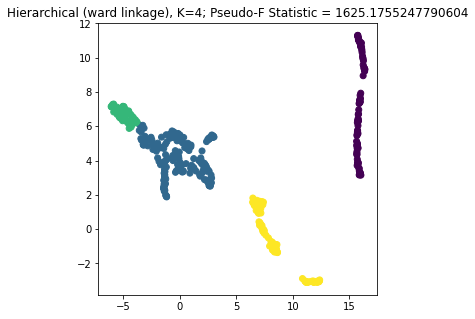

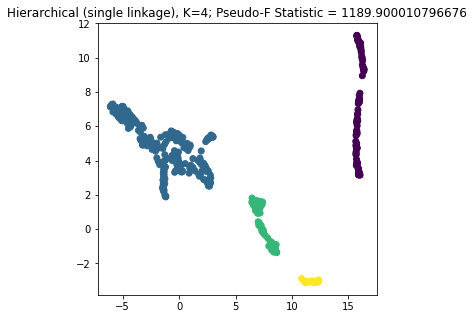

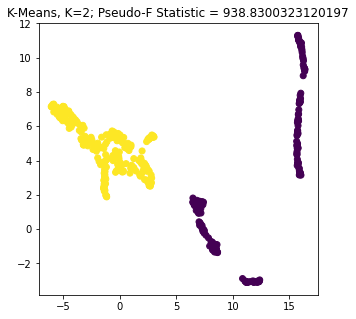

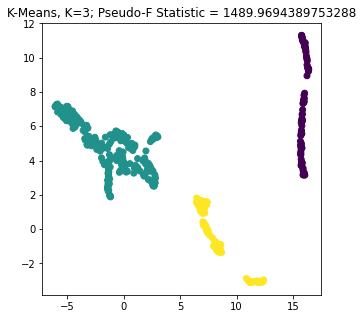

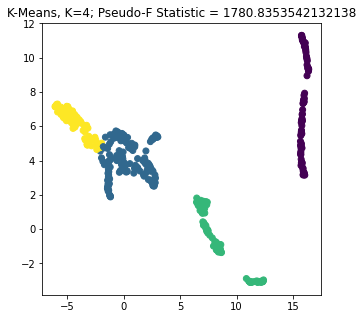

In [9]:
results = {}
for method in ["Hierarchical", "K-Means"]:
    for nclust in [2,3,4]:
        if method == "Hierarchical":
            for linkage in ["complete", "average", "ward", "single"]:
                clusters = mod.hieragglo(embedded, transform=None, linkage=linkage, criteria="n_clusters", parameter=nclust, dendro=False)
                pseudoF = mod.calinski_harabasz_score(embedded, labels=clusters)
                resstr = f"{method} ({linkage} linkage), K={nclust}"
                mod.plot_data(embedded, transform=None, clusters=clusters, title=resstr + f"; Pseudo-F Statistic = {pseudoF}")
                results[resstr] = pseudoF
        elif method == "K-Means":
                clusters = mod.sklc.KMeans(n_clusters=nclust, random_state=1234).fit_predict(embedded)
                pseudoF = mod.calinski_harabasz_score(embedded, labels=clusters)
                resstr = f"{method}, K={nclust}"
                mod.plot_data(embedded, transform=None, clusters=clusters, title=resstr + f"; Pseudo-F Statistic = {pseudoF}")
                results[resstr] = pseudoF

K-Means, K=4                            1780.8353542132138
Hierarchical (complete linkage), K=4    1681.162882887
Hierarchical (average linkage), K=4     1625.1755247790604
Hierarchical (ward linkage), K=4        1625.1755247790604
Hierarchical (complete linkage), K=3    1489.9694389753288
Hierarchical (average linkage), K=3     1489.9694389753288
Hierarchical (ward linkage), K=3        1489.9694389753288
Hierarchical (single linkage), K=3      1489.9694389753288
K-Means, K=3                            1489.9694389753288
Hierarchical (single linkage), K=4      1189.900010796676
Hierarchical (complete linkage), K=2    938.8300323120197
Hierarchical (average linkage), K=2     938.8300323120197
Hierarchical (ward linkage), K=2        938.8300323120197
K-Means, K=2                            938.8300323120197
Hierarchical (single linkage), K=2      580.8389449121072


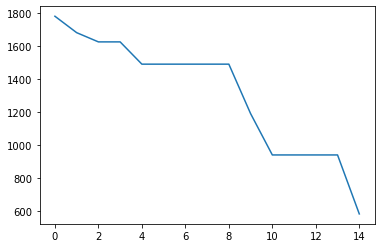

In [10]:
results_sorted = sorted(results.items(), key=lambda t: -t[1])
mod.plt.plot([n for _,n in results_sorted])
for resstr, n in results_sorted:
    print(resstr + " "*max(2, 40-len(resstr)) + str(n))

In [14]:
## Best clusters for k=3 and k=4 ## 
c3 = mod.hieragglo(embedded, transform=None, linkage="complete", criteria="n_clusters", parameter=3, dendro=False)
c4 = mod.sklc.KMeans(n_clusters=4).fit_predict(embedded)

In [15]:
groups_c3 = [mod.data[c3 == i] for i in mod.np.unique(c3)]
groups_c4 = [mod.data[c4 == i] for i in mod.np.unique(c4)]

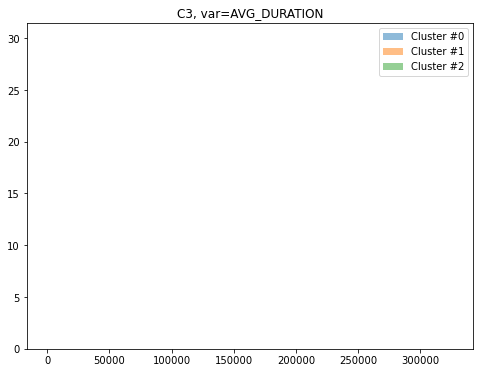

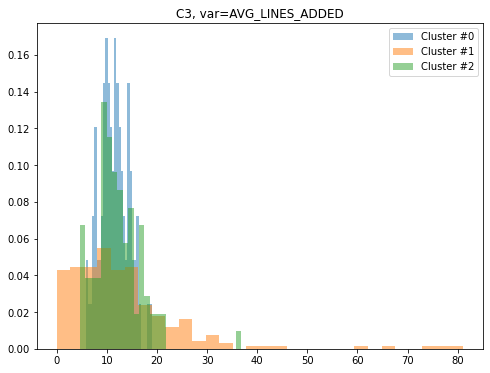

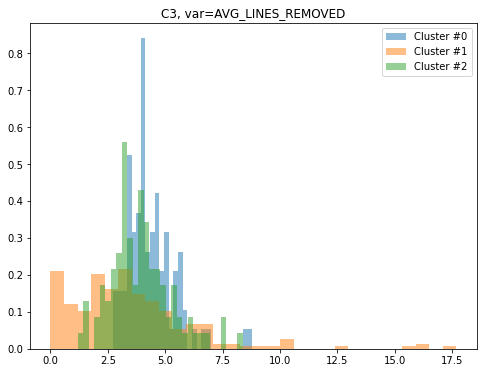

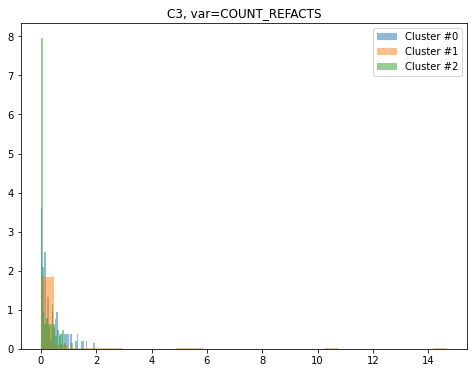

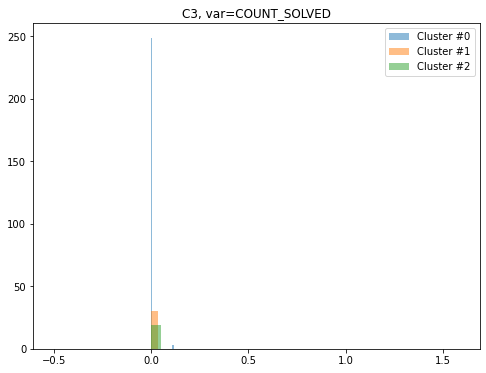

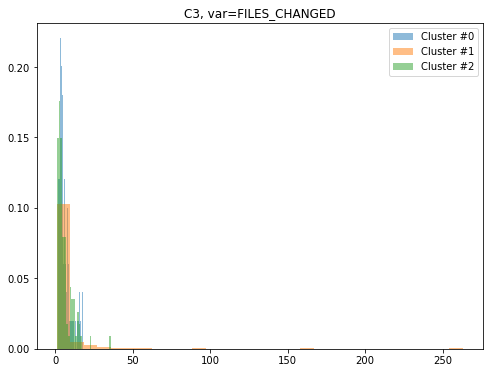

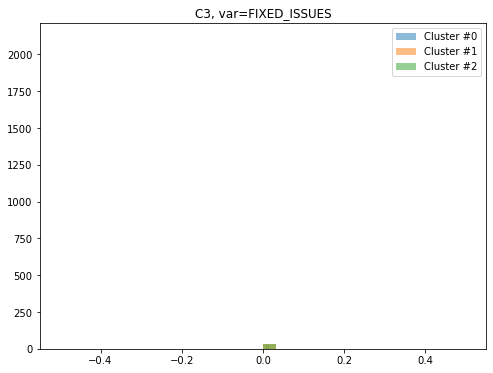

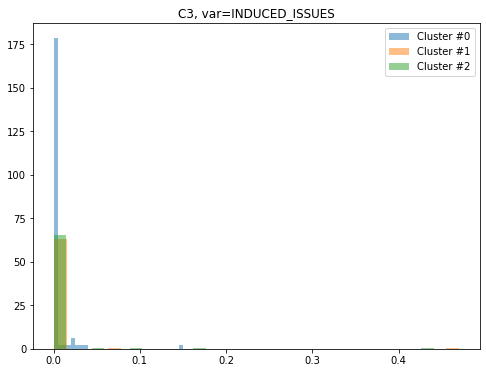

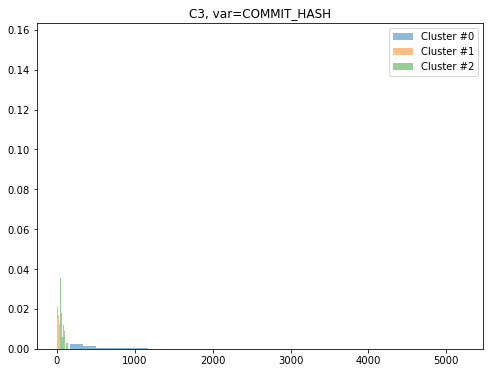

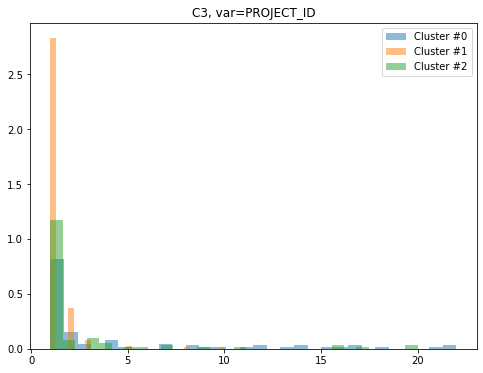

In [16]:
for var in mod.data.columns:
    mod.plt.figure(figsize=(8,6))
    mod.plt.hist(groups_c3[0][var], bins=30, density=True, alpha=0.5, label=f"Cluster #{0}")
    mod.plt.hist(groups_c3[1][var], bins=30, density=True, alpha=0.5, label=f"Cluster #{1}")
    mod.plt.hist(groups_c3[2][var], bins=30, density=True, alpha=0.5, label=f"Cluster #{2}")
    mod.plt.title(f"C3, var={var}")
    mod.plt.legend()
    mod.plt.show()

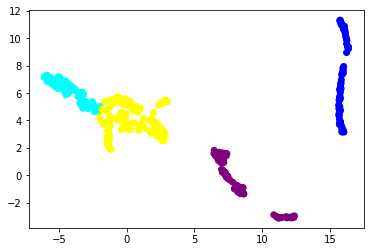

In [17]:
col = {0:"blue", 1:"yellow", 2:"purple", 3:"cyan"}
c = mod.np.array([col[clust] for clust in clusters])

mod.plt.scatter(embedded[:,0], embedded[:,1], c = c)

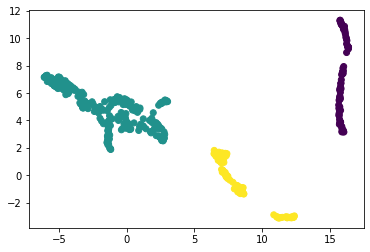

In [18]:
mod.plt.scatter(embedded[:,0], embedded[:,1], c = c3)